## Basic Information

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
song_data = pd.read_csv("./data/song_data.csv")

In [3]:
song_data.shape

(18835, 15)

In [4]:
song_data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [5]:
song_data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [6]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


We can see through the number of unique values that there are duplicated songs in the dataset ($18335$ rows, but only $13070$ songs), so we need to  deduplicate the data first in data preprocessing. 

In [7]:
song_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

# Data preprocessing

We first drop duplicated rows, and then drop the column of song names, as they are not suitble features (strings) for our purpose of data analysis.

Here we notice that there are $14926$ songs remaining, while there are $13070$ songs. This may indicate different songs with the same name, so we may keep all of them.

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

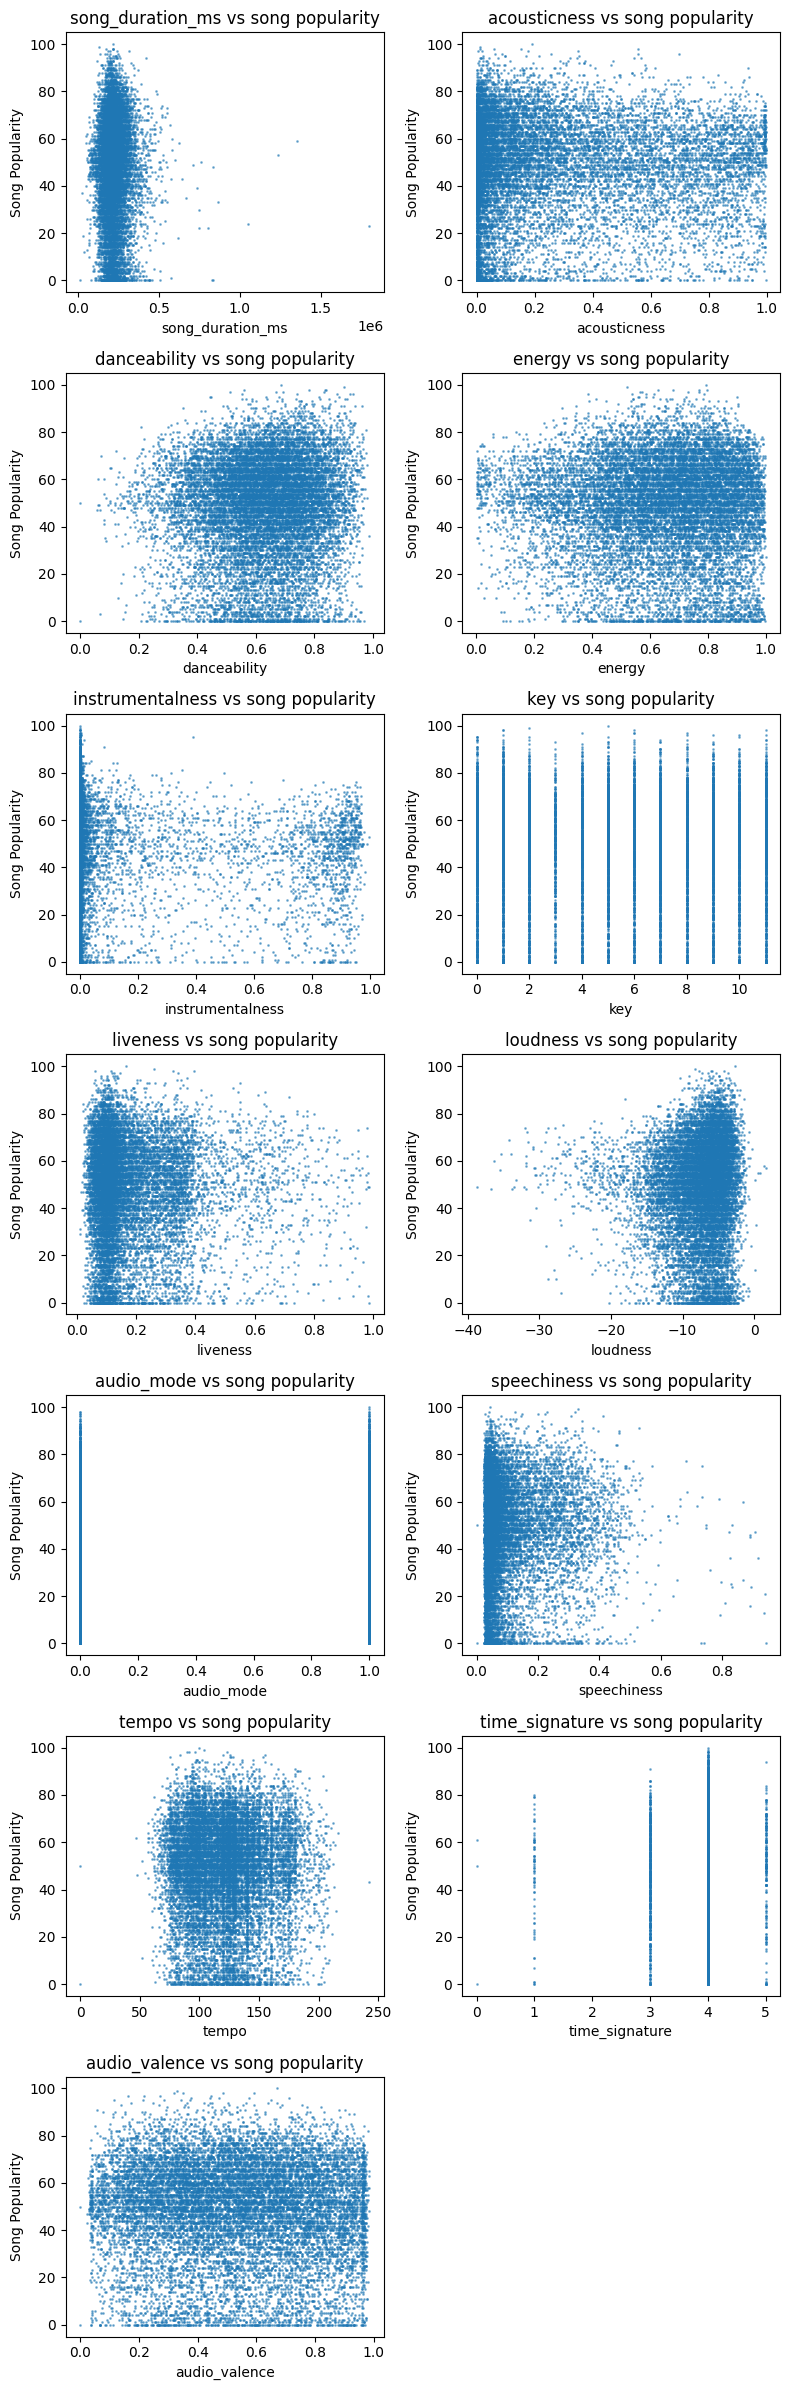

In [8]:
# Drop duplicated rows and remove the 'song_name' column
song_data = song_data.drop_duplicates().drop(columns=['song_name'])
print(song_data.head())

# Features to plot against 'song_popularity'
features = song_data.columns.drop('song_popularity')

# # Create scatter plots for each feature against 'song_popularity'
plt.figure(figsize=(8, 24))
for i, feature in enumerate(features, 1):
    plt.subplot(7, 2, i)  # Create grid of subplots
    plt.scatter(song_data[feature], song_data['song_popularity'], alpha=0.5, s=1)
    plt.title(f'{feature} vs song popularity')
    plt.xlabel(feature)
    plt.ylabel('Song Popularity')
    plt.tight_layout()

plt.show()

## Handling missing data

We can see through below that there is no missing value in all features and outcome. This means that we are free from handling missing valies.

In [9]:
song_data.isna().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## One-hot encoding

Notice that the features key, audio mode, and time signiture are categorical, meaning that the relevant magnitude of the features has no meaning to our model.

Based on the encoding result, at most one of the encoded column for each feature could be $1$. If all the columns corresponding to a column is $0$, then it means that the corresponding one-hot-encoded feature has value $0$.

In [10]:
# Features to one-hot encode
categorical_features = ['key', 'audio_mode', 'time_signature']

# Perform one-hot encoding
song_data_encoded = pd.get_dummies(song_data, columns=categorical_features, drop_first=True)

# Display the first few rows
print(song_data_encoded.head())

# Display the columns after one-hot encoding
features = song_data_encoded.columns.drop("song_popularity")
print(features)

# Overwrite song_data with its one-hot encoded version 
song_data = song_data_encoded

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  key_7  \
0          0.000029    0.0589    -4.095       0.0294  167.060  ...  False   
1          0.000000    0.1080    -6.407       0.0498  105.256  ...  False   
2          0.447000    0.2550    -7.828       0.0792  123.881  ...  False   
3          0.003550    0.1020    -4.938       0.1070  122.444  ...  False   
4          0.000000    0.1130    -5.065       0.0313  172.011  ...  False   

   key_8  key_9  key_10  key_11  audio_mode_1  time_signature_1  \
0   True  Fal

## Feature Selection

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

###  Feature Selection with Correlation

First look at the correlation of each features to song popularity.

The result indicates that all features have only very weak correlation with song popularity, with at most $\approx 0.09$ in absolute value. This suggests that we might consider combination of several features to fit a better model.

Correlation of features with 'Song Popularity':
 danceability        0.056415
loudness            0.052114
key_1               0.031264
time_signature_4    0.022226
key_6               0.020305
audio_mode_1        0.008824
key_11              0.008603
key_10              0.007812
time_signature_5    0.001493
key_5              -0.000070
speechiness        -0.001971
key_8              -0.002629
key_4              -0.007740
song_duration_ms   -0.007766
time_signature_1   -0.009507
key_3              -0.010737
key_2              -0.011771
key_9              -0.015307
key_7              -0.015710
energy             -0.016468
time_signature_3   -0.023153
tempo              -0.029560
acousticness       -0.031658
liveness           -0.038553
audio_valence      -0.043963
instrumentalness   -0.093032
Name: song_popularity, dtype: float64


<Axes: >

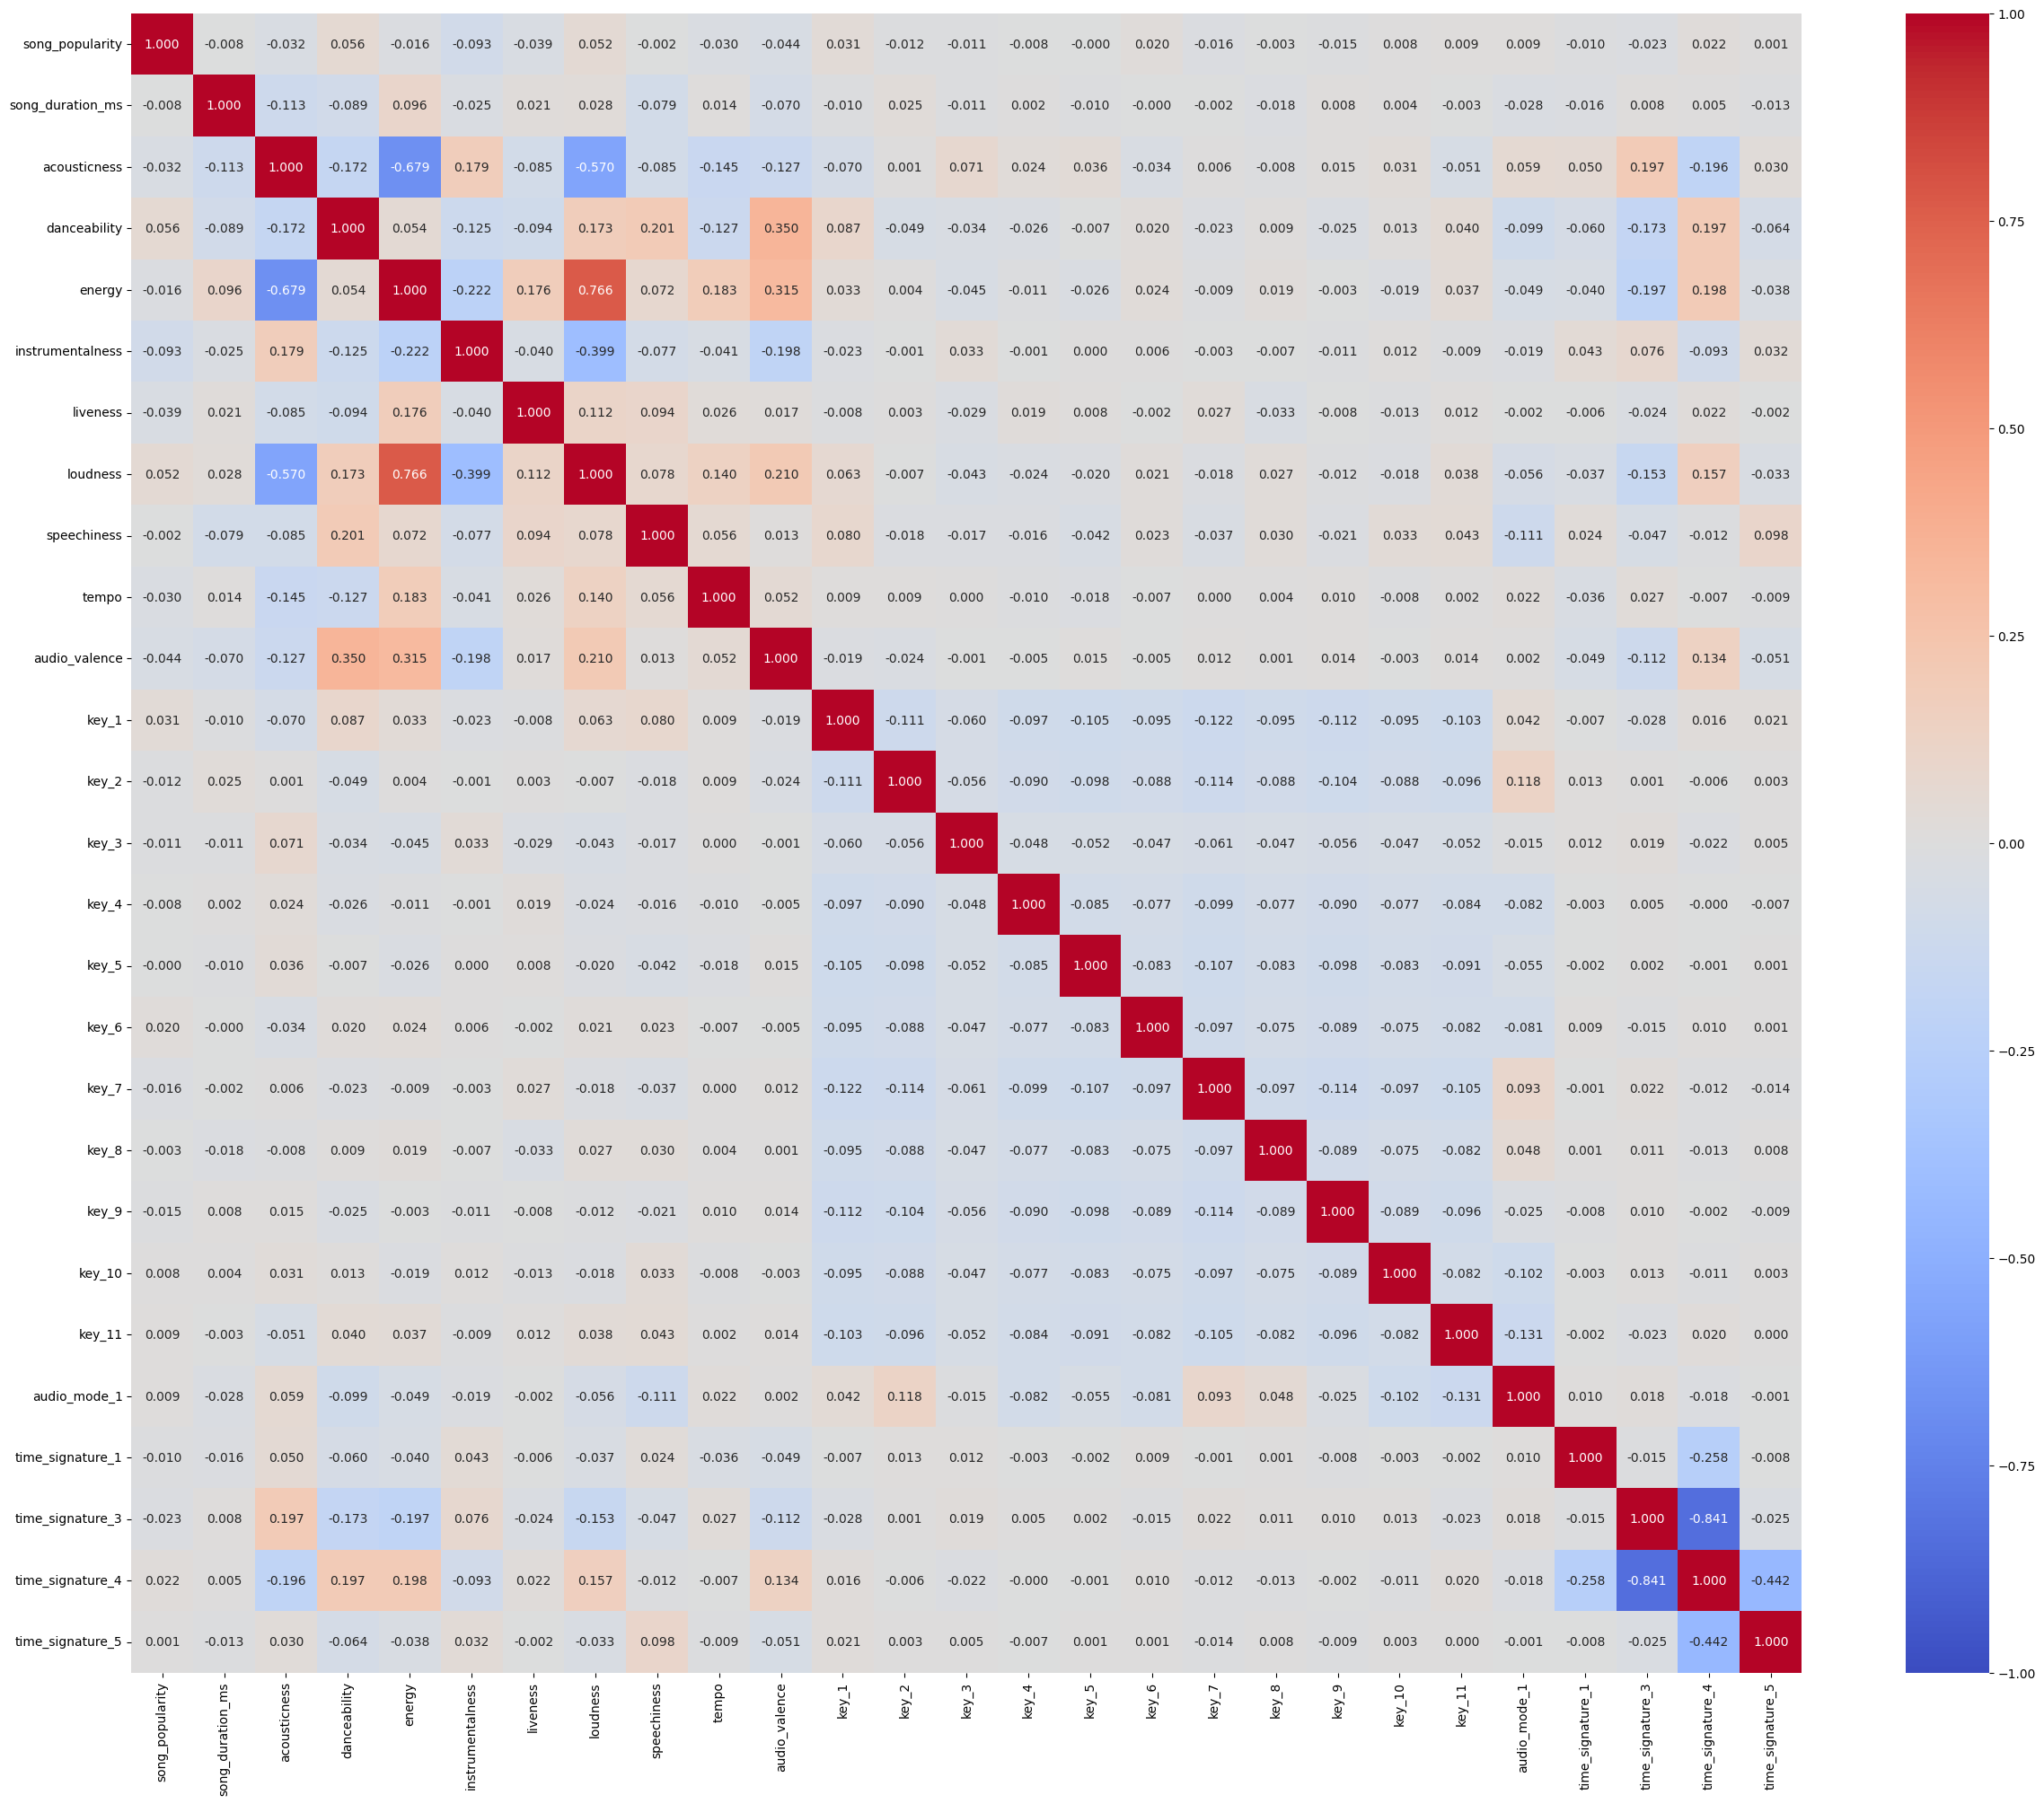

In [13]:


# Compute correlation matrix with the target variable
target_correlation = song_data.corr()['song_popularity'].sort_values(ascending=False)

# Display top correlated features
print("Correlation of features with 'Song Popularity':\n", target_correlation.drop("song_popularity"))


# Plot heatmap for all features
plt.figure(figsize=[30,24])
sns.heatmap(song_data.corr(), annot=True, vmax=1, vmin=-1, center=0, fmt=".3f", cmap="coolwarm") 

In [14]:
# Feature selection based on correlation with `song_popularity`
correlation_threshold = 0.02
selected_corr_features = song_data.corr()['song_popularity'].abs().sort_values(ascending=False)

selected_corr_features = selected_corr_features[selected_corr_features > correlation_threshold].index.drop('song_popularity')
print(f"Selected features: {list(selected_corr_features)}")

Selected features: ['instrumentalness', 'danceability', 'loudness', 'audio_valence', 'liveness', 'acousticness', 'key_1', 'tempo', 'time_signature_3', 'time_signature_4', 'key_6']


### Feature Selection with SelectKBest

In [15]:

# Use statistical tests (e.g., ANOVA F-value) to score each feature
k = 12  # Number of top features to select
select_k_best = SelectKBest(score_func=f_regression, k=k)
X_selected_kbest = select_k_best.fit_transform(song_data.drop(columns=['song_popularity']), song_data['song_popularity'])

# Get selected feature names
selected_kbest_features = song_data.drop(columns=['song_popularity']).columns[select_k_best.get_support()]
print(f"Top {k} features from SelectKBest: {list(selected_kbest_features)}")

Top 12 features from SelectKBest: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'audio_valence', 'key_1', 'key_6', 'time_signature_3', 'time_signature_4']


### Feature Selection with Random Forest

In [16]:
rf = RandomForestRegressor(random_state=42)
rf.fit(song_data.drop(columns=['song_popularity']), song_data['song_popularity'])

# Sort features by importance
importance_scores = pd.Series(rf.feature_importances_, index=song_data.drop(columns=['song_popularity']).columns)
selected_rf_features = importance_scores.nlargest(k).index
print(f"Top {k} features from Random Forest: {list(selected_rf_features)}")

Top 12 features from Random Forest: ['loudness', 'acousticness', 'song_duration_ms', 'audio_valence', 'tempo', 'danceability', 'energy', 'speechiness', 'liveness', 'instrumentalness', 'audio_mode_1', 'key_7']


### Recursive Feature Elimination (RFE) with Linear Regression

In [17]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=k)
rfe.fit(song_data.drop(columns=['song_popularity']), song_data['song_popularity'])

# Get selected features
selected_rfe_features = song_data.drop(columns=['song_popularity']).columns[rfe.support_]
print(f"Top {k} features from RFE: {list(selected_rfe_features)}")

Top 12 features from RFE: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'audio_valence', 'key_6', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5']


### Final Selected Features

In [18]:
# selected_features = list(set(selected_kbest_features) & set(selected_rf_features) & set(selected_rfe_features))
# print(f"Features selected by all methods: {selected_features}")

selected_features = features

## Data Splitting and Scaling

In [19]:
# Splitting the data
X = song_data[selected_features]
y = song_data['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scaling the data
scaler = StandardScaler()
# Fit the scaler only on the training data, then transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (11940, 26)
X_test_scaled shape: (2986, 26)
y_train shape: (11940,)
y_test shape: (2986,)


## Machine Learning Models

### Linear Regression

In [22]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on training set
model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared Value (R^2): {r2_lr:.2f}")
print(f"Incercept Value: {model.intercept_:.2f}")

Mean Squared Error (MSE): 402.58
Root Mean Squared Error (RMSE): 20.06
R-squared Value (R^2): 0.02
Incercept Value: 48.79


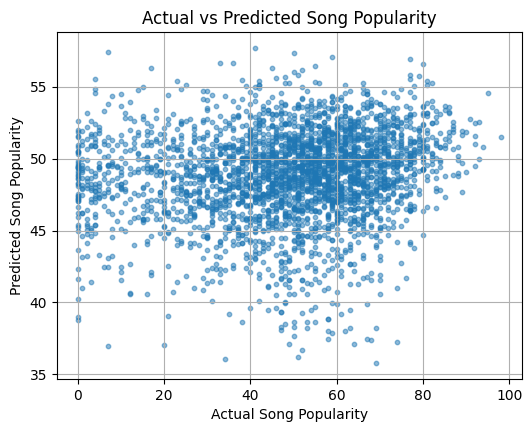

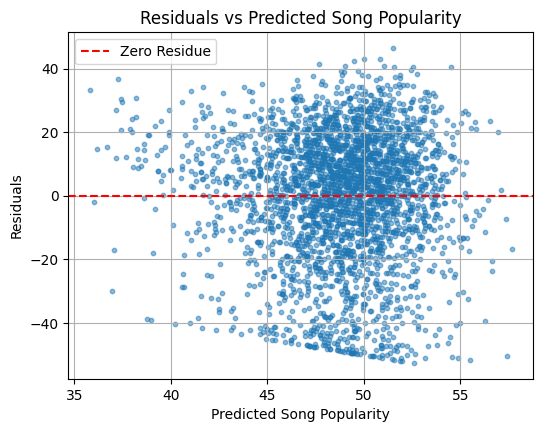

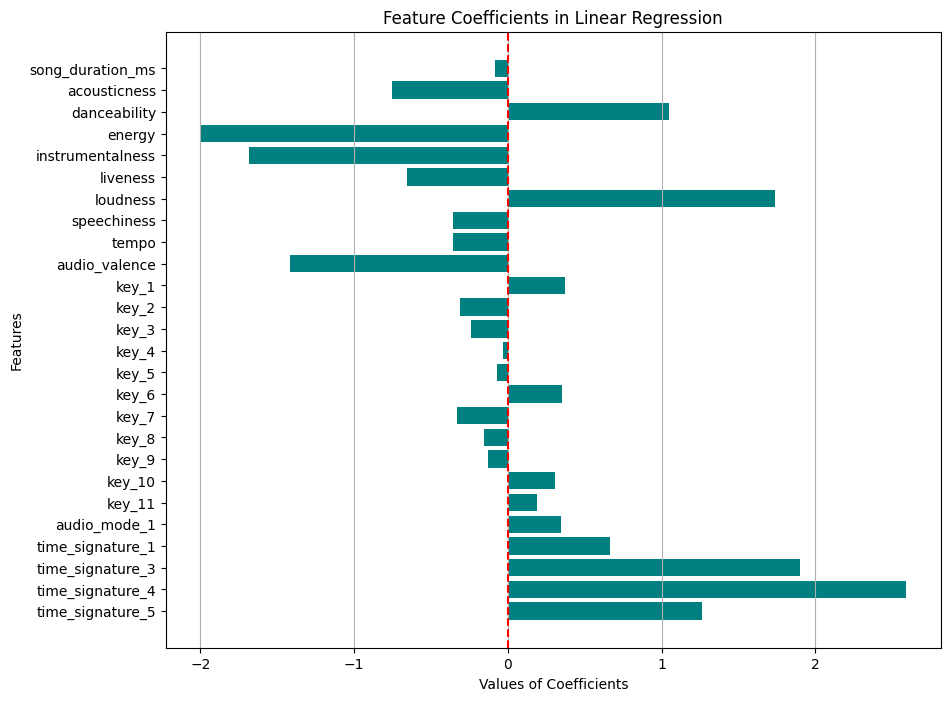

In [23]:
# Plot actual vs predicted values of song popularity
plt.figure(figsize=(6, 4.5))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y_test = y_pred")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Actual vs Predicted Song Popularity")
plt.grid(True)
# plt.legend()
plt.show()

# Plot residuals against predicted song popularity
residuals = y_test - y_pred
plt.figure(figsize=(6, 4.5))
plt.scatter(y_pred, residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residue')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Song Popularity")
plt.grid(True)
plt.legend()
plt.show()

# Plot parameter values (coefficients)
coefficients = model.coef_
features = X.columns  # Feature names

plt.figure(figsize=(10, 8))
plt.barh(features, coefficients, color='teal')
plt.axvline(x=0, color='r', linestyle='--')  # Line at zero
plt.xlabel("Values of Coefficients")
plt.ylabel("Features")
plt.title("Feature Coefficients in Linear Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x') 
plt.show()

### Ridge Regression

Here we minimize the function $||y - Xw||^2_2 + \alpha ||w||^2_2$, where $\alpha$ is a hyperparameter we need to tune by searching from $10^{-2} = 0.01$ to $10^{3.3} \approx 2000$ in log scale.

To find the best hyperparameter, we use $5$-fold cross validation.

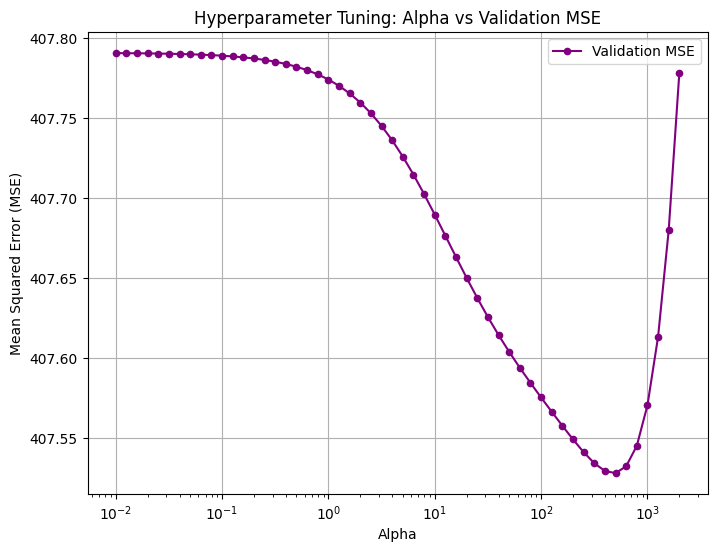

In [24]:
# Define Ridge Regression model and the range of hyperparameters (alpha values)
ridge = Ridge()
param_grid = {'alpha': np.logspace(-2, 3.3, 54)}  # alpha values from 0.01 to 10^3.3 \approx 2000

# Find the best hyperparameter
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Visualize hyperparameter tuning results
plt.figure(figsize=(8, 6))
alphas = grid_search.cv_results_['param_alpha'].data.astype(float)
mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Convert negative MSE back to positive
plt.plot(alphas, mean_test_scores, marker='o', label='Validation MSE', color='purple', markersize=4.5)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning: Alpha vs Validation MSE")
plt.legend()
plt.grid(True)
plt.show()

We can see through the result below that the best hyperparameter is $\hat{\alpha} \approx 500$. Though the small $R^2$ indicate that the fitting is ineffective.

In [25]:
# Get the best model through hyperparameter
ridge_est = grid_search.best_estimator_
alpha_est = grid_search.best_params_['alpha']

print(f"Best alpha: {alpha_est:.4f}")
print(f"Best cross-validated score (negative of MSE): {grid_search.best_score_:.2f}")

# Evaluate the model on the test data
y_pred_ridge = ridge_est.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Test Set Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Test Set R-squared Value (R^2): {r2_ridge:.2f}")
print(f"Incercept Value: {ridge_est.intercept_:.2f}")

Best alpha: 501.1872
Best cross-validated score (negative of MSE): -407.53
Test Set Mean Squared Error (MSE): 402.57
Test Set Root Mean Squared Error (RMSE): 20.06
Test Set R-squared Value (R^2): 0.02
Incercept Value: 48.79


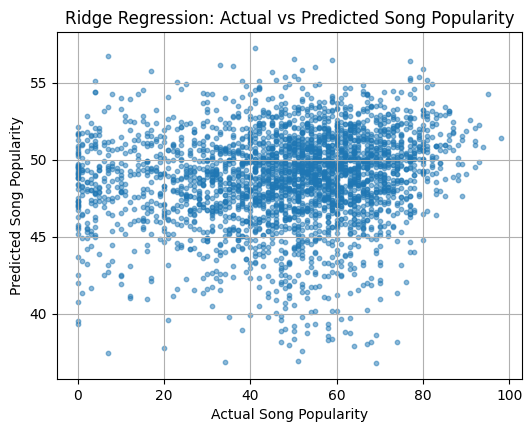

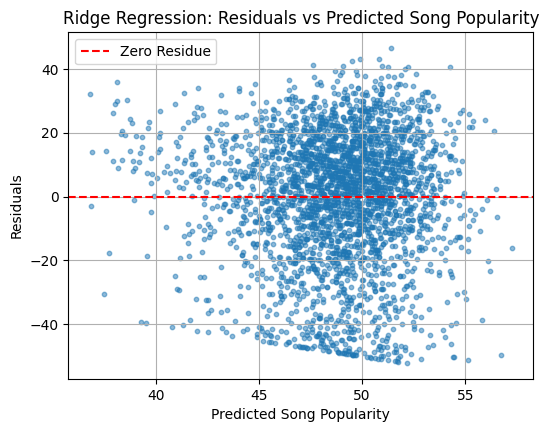

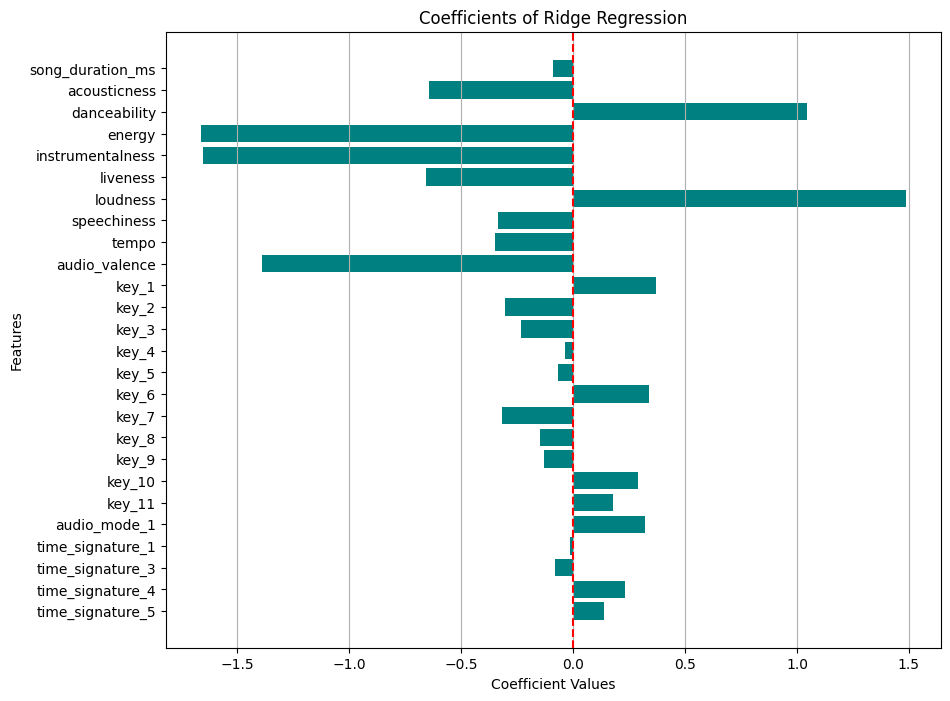

In [26]:
# Plot actual vs predicted values of song popularity
plt.figure(figsize=(6, 4.5))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, s=10)#, label="Predicted vs Actual Song Popularity")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y_test = y_pred")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Ridge Regression: Actual vs Predicted Song Popularity")
# plt.legend()
plt.grid(True)
plt.show()

# Plot residuals against predicted song popularity
residuals = y_test - y_pred_ridge
plt.figure(figsize=(6, 4.5))
plt.scatter(y_pred_ridge, residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residue')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("Ridge Regression: Residuals vs Predicted Song Popularity")
plt.grid(True)
plt.legend()
plt.show()

coefficients = ridge_est.coef_
features = X.columns  # Feature names

plt.figure(figsize=(10, 8))
plt.barh(features, coefficients, color='teal')
plt.axvline(x=0, color='r', linestyle='--')  # Line at zero
plt.xlabel("Coefficient Values")
plt.ylabel("Features")
plt.title("Coefficients of Ridge Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x')
plt.show()


### LASSO Regression

Here we minimize the function $\frac{1}{2N} ||y - Xw||^2_2 + \alpha * ||w||_1$, where $N$ is the number of smaples, and $\alpha$ is a hyperparameter we need to tune by searching from $10^{-4}$ to $10$ in log scale. Note that the scale of $\alpha$ could be different with that in Ridge Regression.

To find the best hyperparameter, we use $5$-fold cross validation.

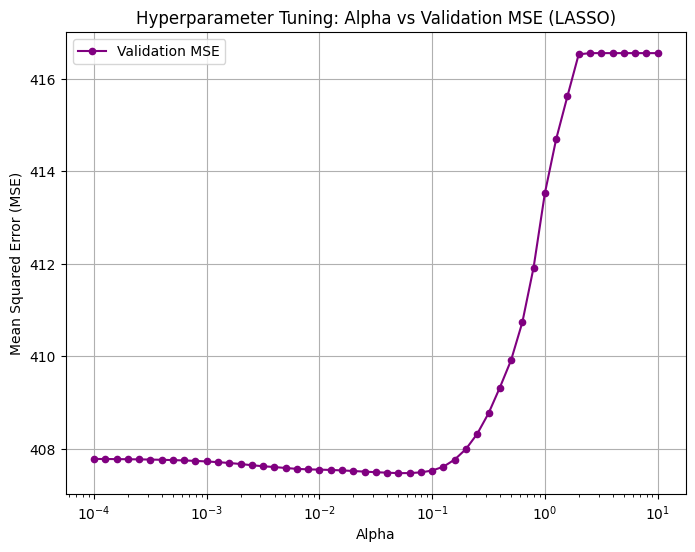

In [27]:
# Define the Lasso Regression model and the range of hyperparameters (alpha values) for tuning
lasso = Lasso(max_iter=20000)  # Increase max_iter for better convergence in some cases

param_grid = {'alpha': np.logspace(-4, 1, 51)}  # alpha values from 0.001 to 1000

# Find the best hyperparameter for LASSO
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Visualize hyperparameter tuning results
plt.figure(figsize=(8, 6))
alphas = grid_search.cv_results_['param_alpha'].data.astype(float)
mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Convert negative MSE back to positive
plt.plot(alphas, mean_test_scores, marker='o', label='Validation MSE', color='purple', markersize=4.5)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning: Alpha vs Validation MSE (LASSO)")
plt.legend()
plt.grid(True)
plt.show()


We can see through the result below that the best hyperparameter is $\hat{\alpha} \approx 0.05$. Though the small $R^2$ indicate that the fitting is ineffective.

In [28]:
# Get the best LASSO model and hyperparameter
lasso_est = grid_search.best_estimator_
alpha_est = grid_search.best_params_['alpha']

print(f"Best alpha: {alpha_est:.4f}")
print(f"Best cross-validated score (negative MSE): {grid_search.best_score_:.2f}")

# Evaluate the model on the test data
y_pred_lasso = lasso_est.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Test Set Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"Test Set R-squared (R²): {r2_lasso:.2f}")
print(f"Incercept Value: {lasso_est.intercept_:.2f}")

Best alpha: 0.0501
Best cross-validated score (negative MSE): -407.48
Test Set Mean Squared Error (MSE): 402.50
Test Set Root Mean Squared Error (RMSE): 20.06
Test Set R-squared (R²): 0.02
Incercept Value: 48.79


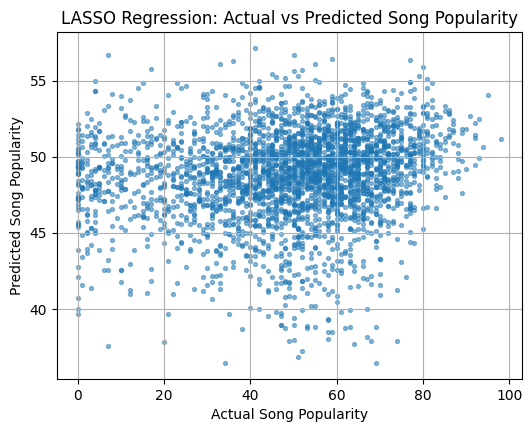

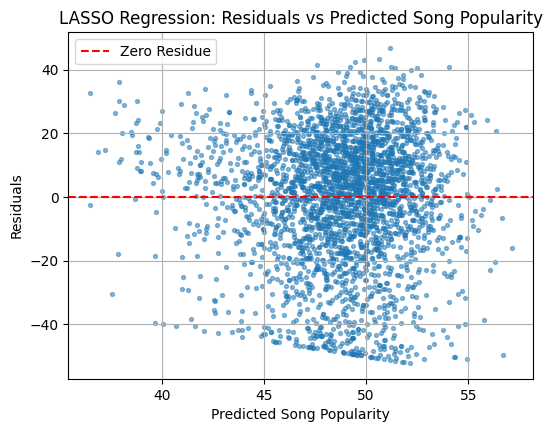

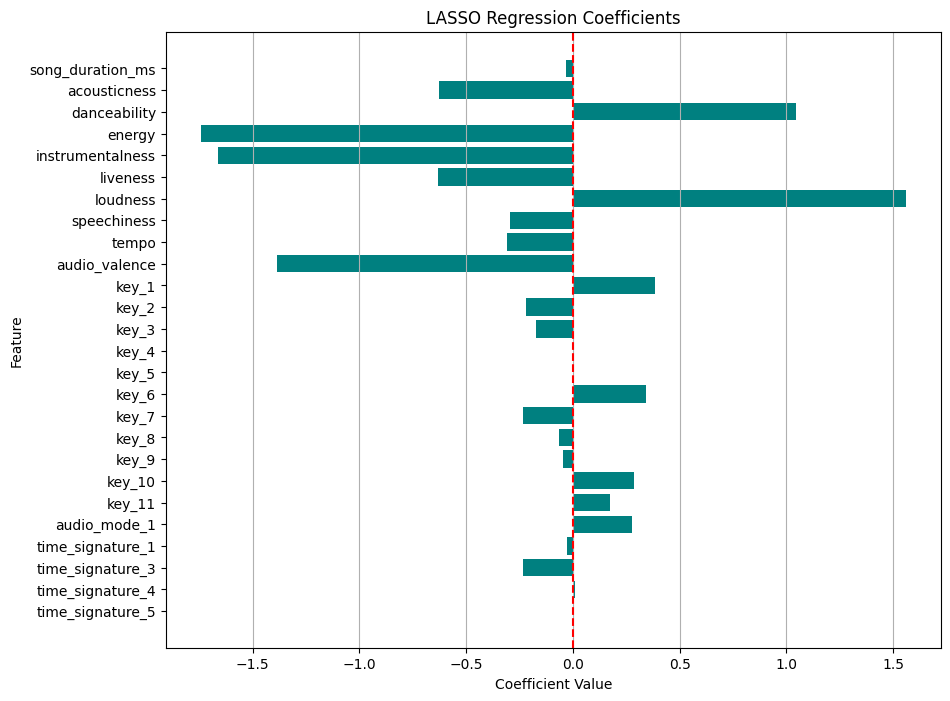

In [29]:
# Plot actual vs predicted values of song popularity
plt.figure(figsize=(6, 4.5))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, s=8)#, label="Predicted vs Actual Song Popularity")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y_pred = y_test")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("LASSO Regression: Actual vs Predicted Song Popularity")
# plt.legend()
plt.grid(True)
plt.show()

# Residual plot of song popularity
residuals = y_test - y_pred_lasso
plt.figure(figsize=(6, 4.5))
plt.scatter(y_pred_lasso, residuals, alpha=0.5, s=8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residue')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("LASSO Regression: Residuals vs Predicted Song Popularity")
plt.legend()
plt.grid(True)
plt.show()

# Coefficient bar plot
coefficients = lasso_est.coef_
features = X.columns  # Feature names

plt.figure(figsize=(10, 8))
plt.barh(features, coefficients, color='teal')
plt.axvline(x=0, color='r', linestyle='--')  # Line at zero
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("LASSO Regression Coefficients")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x')
plt.show()

## Random Forest Regression

In [30]:
# from sklearn.ensemble import RandomForestRegressor

# Step 1: Define the Random Forest Regression model
rf = RandomForestRegressor(random_state=42)

# Step 2: Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf node
}
print("Step 2 done")
# Step 3: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print("Step 3 done")

Step 2 done
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV]

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estim

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   9.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   9.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time

In [31]:
# Step 4: Get the best model and hyperparameters
rf_est = grid_search.best_estimator_

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validated score (negative MSE): {grid_search.best_score_:.2f}")

# Step 5: Evaluate the model on the test data
y_pred_rf = rf_est.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Test Set Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Test Set R-squared Value (R^2): {r2_rf:.2f}")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated score (negative MSE): -393.16
Step 4 done
Test Set Mean Squared Error (MSE): 388.36
Test Set Root Mean Squared Error (RMSE): 19.71
Test Set R-squared Value (R^2): 0.05
Step 5 done


We can see that there are boosts in performance for the nonlinear random forest regression model, but the prediction power is still limited.

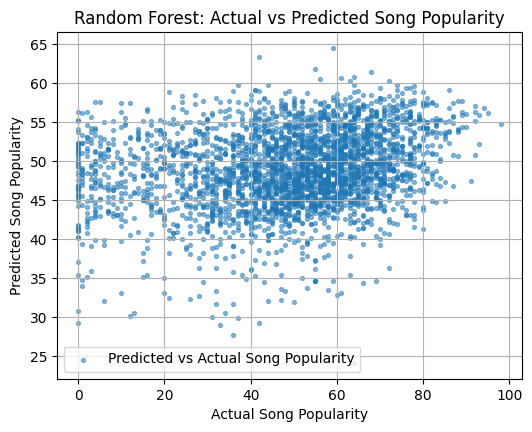

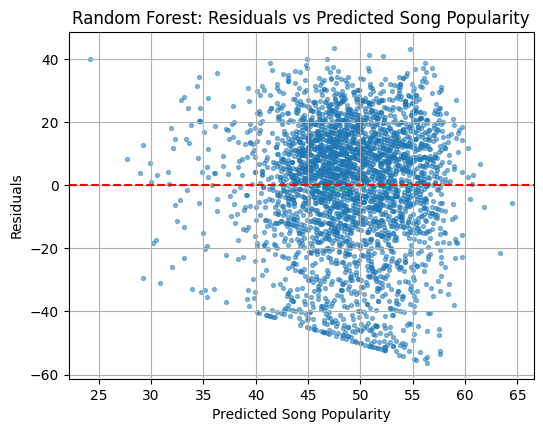

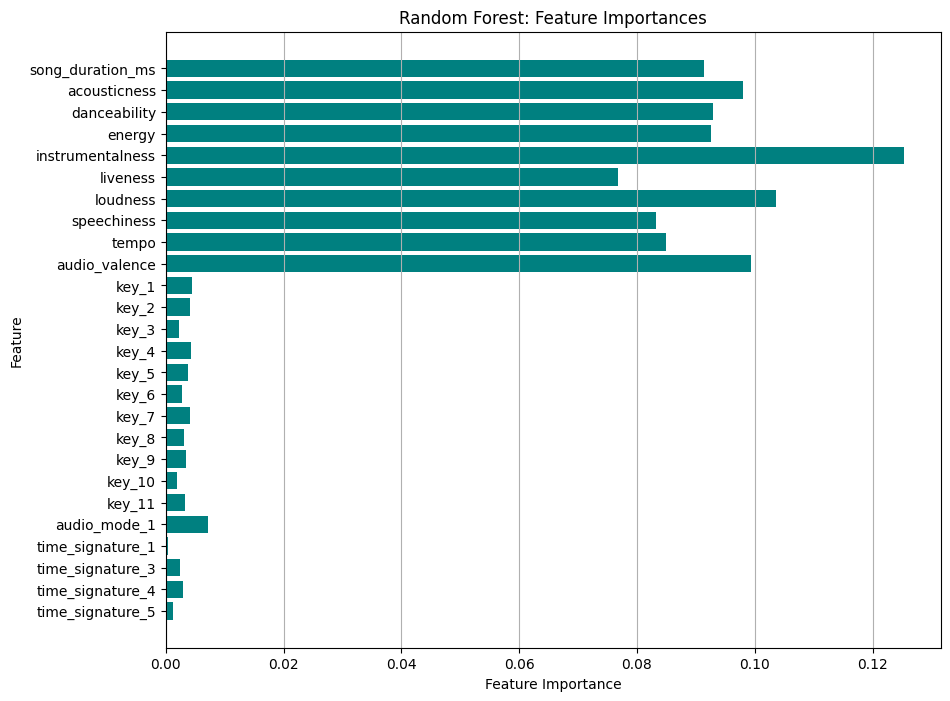

In [32]:
# Step 6: Plot actual vs predicted values
plt.figure(figsize=(6, 4.5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predicted vs Actual Song Popularity", s=8)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y_test = y_pred")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Random Forest: Actual vs Predicted Song Popularity")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Residual plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(6, 4.5))
plt.scatter(y_pred_rf, residuals, alpha=0.5, s=8)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals vs Predicted Song Popularity")
plt.grid(True)
plt.show()

# Step 8: Feature Importance Plot
importances = rf_est.feature_importances_
features = X.columns  # Feature names

plt.figure(figsize=(10, 8))
# sorted_idx = np.argsort(importances)[::-1]  # Sort features by importance
# plt.barh(np.array(features)[sorted_idx], importances[sorted_idx], color='skyblue')
plt.barh(np.array(features), importances, color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest: Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis = 'x')
plt.show()

### Neural Network

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [35]:
# Define the Enhanced Neural Network
class NeuralNet(nn.Module):
#     def __init__(self, input_size):
#         super(NeuralNet, self).__init__()
#         self.network = nn.Sequential(
#             nn.Linear(input_size, 128),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(128, 64),
#             nn.BatchNorm1d(64),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(64, 32),
#             nn.BatchNorm1d(32),
#             nn.ReLU(),
#             nn.Linear(32, 1)
#         )
    
#     def forward(self, x):
#         return self.network(x)
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch 250/1500, Train Loss: 419.7676, Test Loss: 424.5872
Epoch 500/1500, Train Loss: 400.4270, Test Loss: 408.4780
Epoch 750/1500, Train Loss: 392.5406, Test Loss: 403.3531
Epoch 1000/1500, Train Loss: 387.8794, Test Loss: 401.8755
Epoch 1250/1500, Train Loss: 384.1347, Test Loss: 401.6470
Epoch 1500/1500, Train Loss: 379.7763, Test Loss: 402.7187


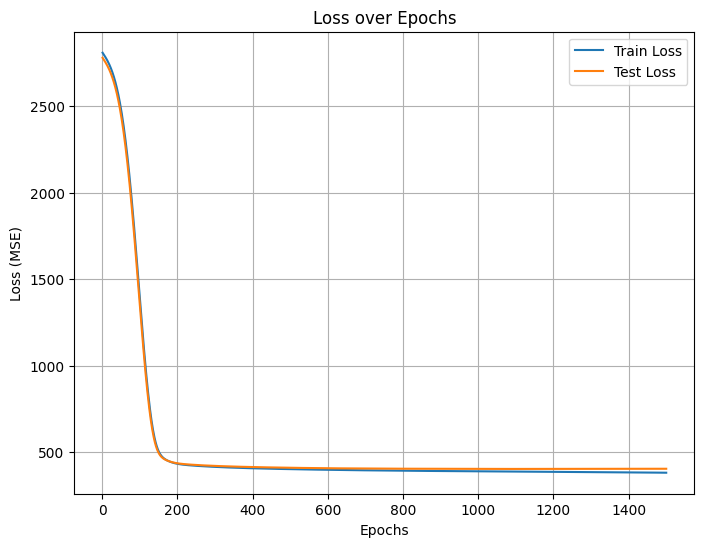

In [36]:
# Model, Loss, Optimizer
input_size = X_train_tensor.shape[1]
model = NeuralNet(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 1500
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    train_loss = criterion(y_pred, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
    
    # Record losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Print progress
    if (epoch + 1) % 250 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Visualization of loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Test Set Mean Squared Error (MSE): 402.72
Test Set Root Mean Squared Error (RMSE): 20.07
Test Set R-squared Value (R^2): 0.02


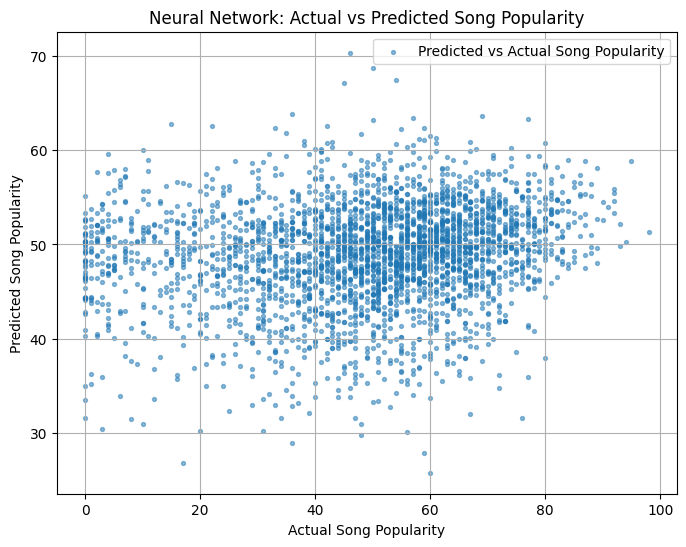

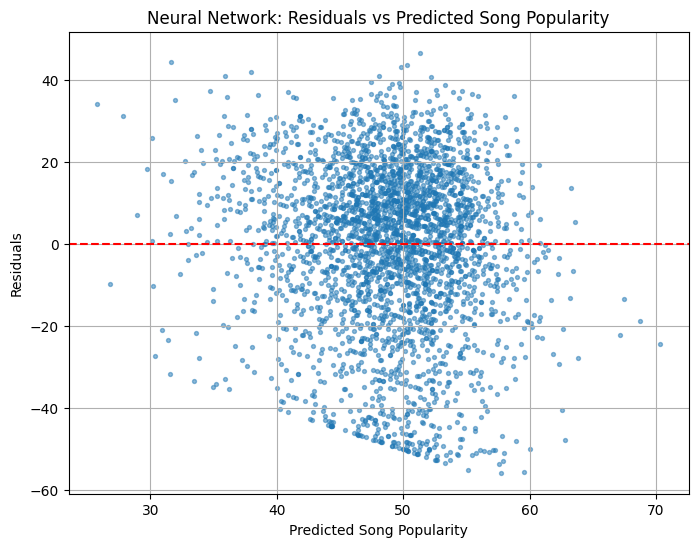

In [37]:
# Evaluation on Test Set
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Test Set Mean Squared Error (MSE): {mse_nn:.2f}")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse_nn:.2f}")
print(f"Test Set R-squared Value (R^2): {r2_nn:.2f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, s=8, label="Predicted vs Actual Song Popularity")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y = x")
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Neural Network: Actual vs Predicted Song Popularity")
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot
residuals_nn = y_test - y_pred_nn.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_nn, residuals_nn, alpha=0.5, s=8)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("Neural Network: Residuals vs Predicted Song Popularity")
plt.grid(True)
plt.show()

# Extract and Visualize Model Parameters
# params = [p.detach().numpy().flatten() for p in model.parameters() if p.requires_grad]
# flattened_params = np.concatenate(params)
# plt.figure(figsize=(10, 6))
# plt.hist(flattened_params, bins=30, color='teal', edgecolor='black')
# plt.xlabel("Parameter Value")
# plt.ylabel("Frequency")
# plt.title("Neural Network: Distribution of Model Parameters")
# plt.grid(True)
# plt.show()


## Model Selection

### Plotting metrics

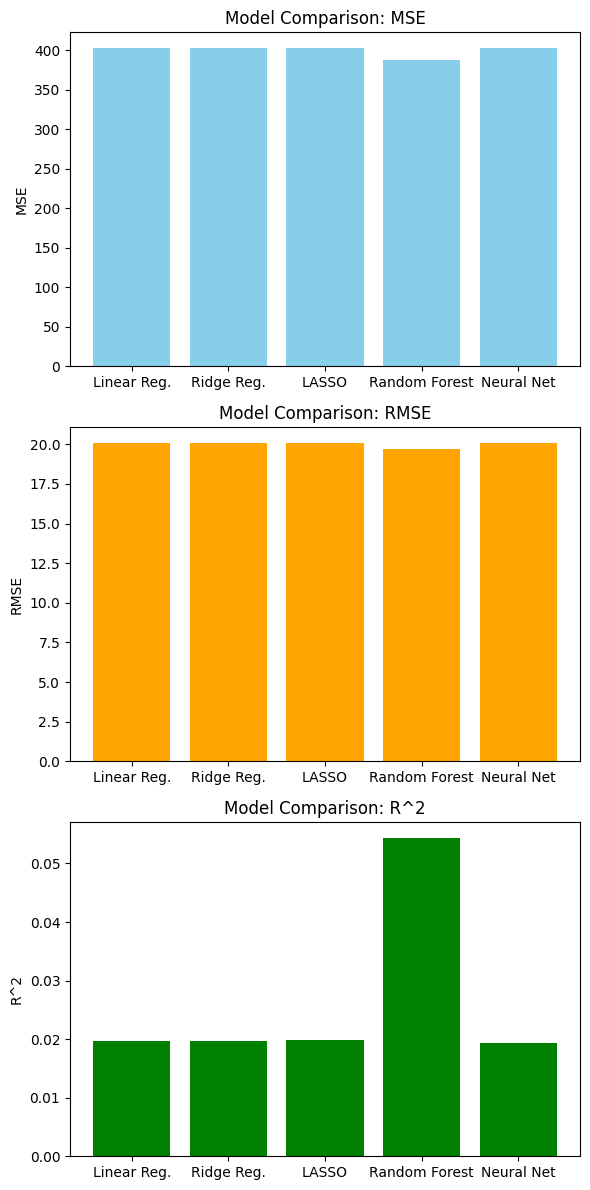

In [38]:
# Define model metrics
model_metrics = {
    "Model": ["Linear Reg.", "Ridge Reg.", "LASSO", "Random Forest", "Neural Net"],
    "MSE": [mse_lr, mse_ridge, mse_lasso, mse_rf, mse_nn],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso, rmse_rf, rmse_nn],
    "R^2": [r2_lr, r2_ridge, r2_lasso, r2_rf, r2_nn]
}

# Convert to a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics)

# Plot the metrics
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Plot MSE
axes[0].bar(metrics_df["Model"], metrics_df["MSE"], color="skyblue")
axes[0].set_title("Model Comparison: MSE")
axes[0].set_ylabel("MSE")
# axes[0].grid(axis='y')

# Plot RMSE
axes[1].bar(metrics_df["Model"], metrics_df["RMSE"], color="orange")
axes[1].set_title("Model Comparison: RMSE")
axes[1].set_ylabel("RMSE")
# axes[1].grid(axis='y')

# Plot R^2
axes[2].bar(metrics_df["Model"], metrics_df["R^2"], color="green")
axes[2].set_title("Model Comparison: R^2")
axes[2].set_ylabel("R^2")
# axes[2].grid(axis='y')

plt.tight_layout()
plt.show()



### Model Selection

In [39]:
# Model Selection
# Select the best model based on RMSE (lower is better)
best_model_idx = metrics_df["RMSE"].idxmin()
best_model_name = metrics_df.loc[best_model_idx, "Model"]
best_model_rmse = metrics_df.loc[best_model_idx, "RMSE"]

print(f"The best model based on RMSE is: {best_model_name}")
print(f"RMSE of the best model: {best_model_rmse:.2f}")

# Alternatively, you can select based on R^2 (higher is better)
best_model_idx_r2 = metrics_df["R^2"].idxmax()
best_model_name_r2 = metrics_df.loc[best_model_idx_r2, "Model"]
best_model_r2 = metrics_df.loc[best_model_idx_r2, "R^2"]

print(f"The best model based on R^2 is: {best_model_name_r2}")
print(f"R^2 of the best model: {best_model_r2:.2f}")


The best model based on RMSE is: Random Forest
RMSE of the best model: 19.71
The best model based on R^2 is: Random Forest
R^2 of the best model: 0.05
